<a href="https://colab.research.google.com/github/rheannlv/MLA_RLV/blob/main/FinalProject_Classification_RLV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 2 - Classification

Logistic Regression

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

In [6]:
from sklearn import set_config
from sklearn.model_selection import GridSearchCV

In [7]:
from google.colab import drive
drive.mount ('/content/gdrive')

Mounted at /content/gdrive


**Reading the Data**

In [8]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/mushroom_data.csv')

In [9]:
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [10]:
df.sample(5)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
50573,438,3,0,10,2.013794,0,2,0.943195,1
27006,1654,6,1,5,0.541568,2359,6,0.943195,1
51318,396,3,3,2,2.013794,0,2,0.888450,1
48559,477,5,3,2,0.633085,1400,12,0.943195,0
3213,212,2,0,7,0.231207,300,6,0.888450,0


In [11]:
df.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


**Statistical and Visual Exploration**

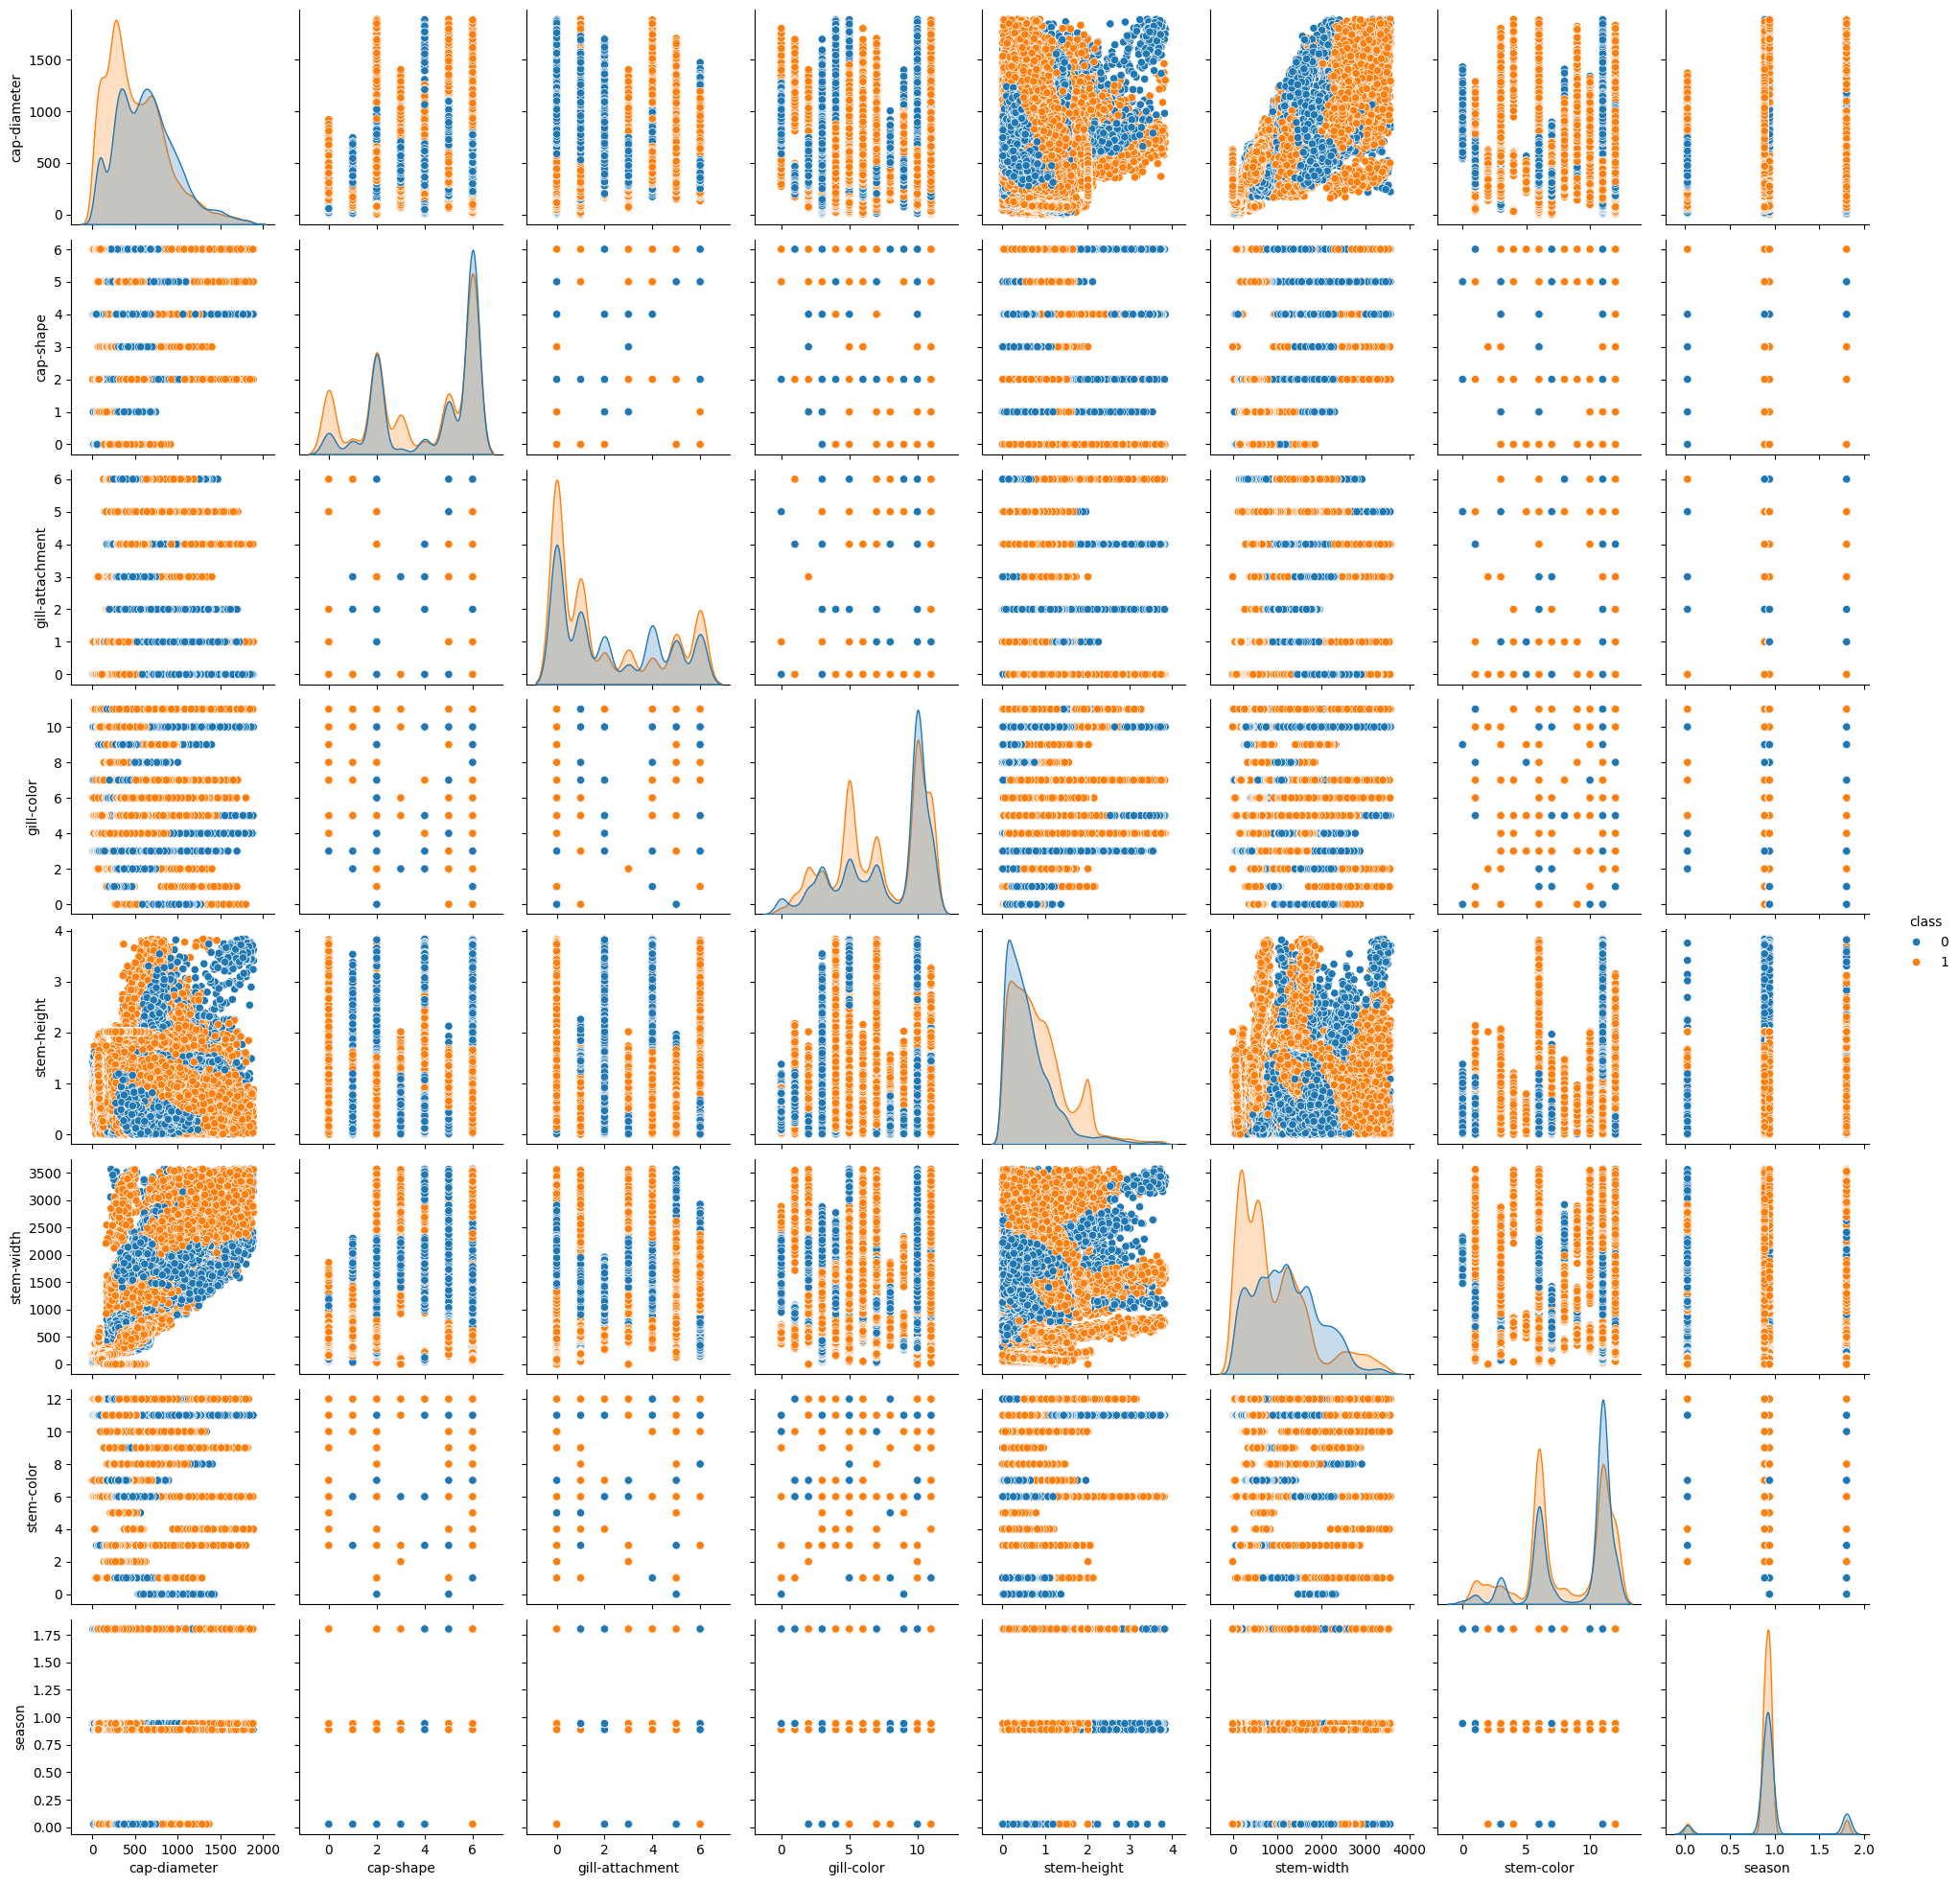

In [30]:
sns.pairplot(df, diag_kind='kde', hue='class')

**Splitting the Data into Train/Test**


In [16]:
X = df[['cap-diameter','cap-shape','gill-attachment','gill-color','stem-height','stem-width', 'stem-color', 'season']]
y = df[['class']]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

**Building the Pipeline**

In [18]:
num_attribs = ['cap-diameter','cap-shape','gill-attachment','gill-color','stem-height','stem-width','stem-color','season']

In [19]:
col_transform = ColumnTransformer(transformers=[
    ('num',MinMaxScaler(), num_attribs),
], remainder='passthrough')

In [20]:
pipeline_log = Pipeline([
    ('trans', col_transform),
    ('mlr', LogisticRegression(max_iter=1000))
])

In [21]:
pipeline_log

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['cap-diameter', 'cap-shape',
                                                   'gill-attachment',
                                                   'gill-color', 'stem-height',
                                                   'stem-width', 'stem-color',
                                                   'season'])])),
                ('mlr', LogisticRegression(max_iter=1000))])

**Executing the Model**

In [22]:
pipeline_log.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['cap-diameter', 'cap-shape',
                                                   'gill-attachment',
                                                   'gill-color', 'stem-height',
                                                   'stem-width', 'stem-color',
                                                   'season'])])),
                ('mlr', LogisticRegression(max_iter=1000))])

**Evaluating the Model**


In [23]:
y_pred = pipeline_log.predict(X_test)

In [24]:
confusion_matrix(y_test, y_pred)

array([[2649, 2230],
       [1655, 4273]])

In [25]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

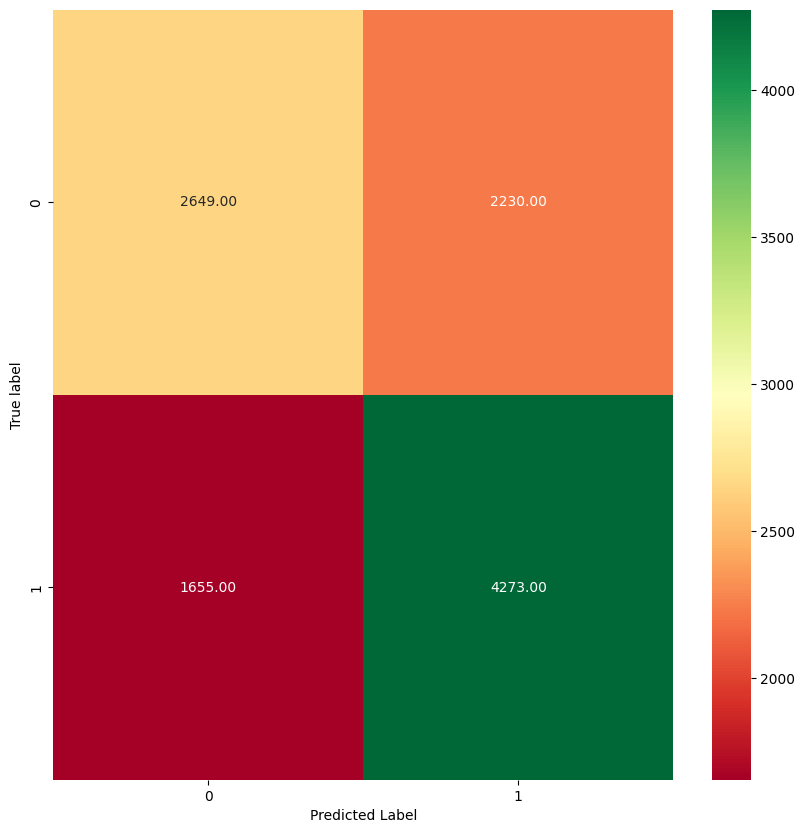

In [26]:
plot_cm(y_test,y_pred)

In [27]:
print('Precision: ', precision_score(y_test,y_pred))
print('Recall: ', recall_score(y_test,y_pred))
print('F1: ', f1_score(y_test,y_pred))

Precision:  0.6570813470705829
Recall:  0.7208164642375169
F1:  0.6874748612340118


In [28]:
y_scores = pipeline_log.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
auc_score = auc(recall, precision)

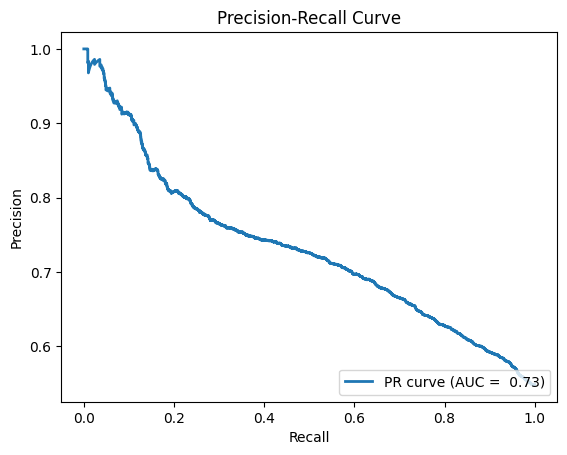

In [29]:
plt.plot(recall, precision, lw=2, label=f'PR curve (AUC = {auc_score: .2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

**Conclusion**

Logistic regression didn't perform well prediciting classification of the mushrooms. Based on the precision, recall and F1 scores they did okay, overall the F1 score resulting in 68%.

KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

**Splitting the Data**

**Building the Pipeline**

In [32]:
pipeline_knn = Pipeline([
                     ('trans', col_transform),
                     ('knn', KNeighborsClassifier(n_neighbors=3)),
                     ])

In [33]:
pipeline_knn

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['cap-diameter', 'cap-shape',
                                                   'gill-attachment',
                                                   'gill-color', 'stem-height',
                                                   'stem-width', 'stem-color',
                                                   'season'])])),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

**Executing the Model**

In [34]:
pipeline_knn.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['cap-diameter', 'cap-shape',
                                                   'gill-attachment',
                                                   'gill-color', 'stem-height',
                                                   'stem-width', 'stem-color',
                                                   'season'])])),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

**Evaluating the Model**

In [35]:
y_pred = pipeline_knn.predict(X_test)

In [36]:
confusion_matrix(y_test, y_pred)

array([[4803,   76],
       [  40, 5888]])

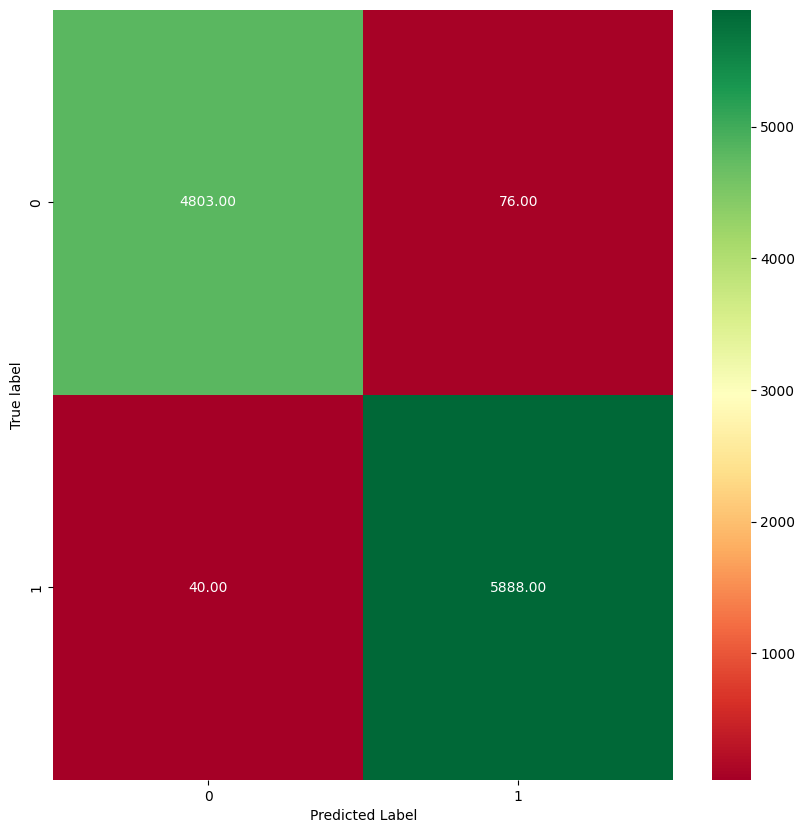

In [37]:
plot_cm(y_test,y_pred)

In [38]:
print('Precision: ', precision_score(y_test,y_pred))
print('Recall: ', recall_score(y_test,y_pred))
print('F1: ', f1_score(y_test,y_pred))

Precision:  0.9872568745808182
Recall:  0.9932523616734144
F1:  0.9902455432223343


In [39]:
y_scores = pipeline_log.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
auc_score = auc(recall, precision)

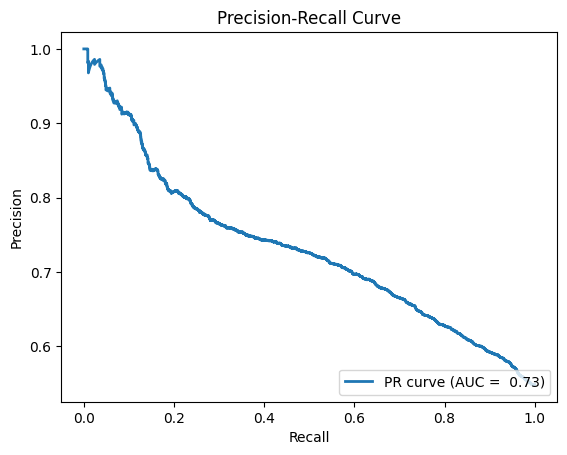

In [40]:
plt.plot(recall, precision, lw=2, label=f'PR curve (AUC = {auc_score: .2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

GridSearch

**Building the Pipeline**

In [41]:
param = {'knn__n_neighbors':[3,5,7,10],
              'knn__weights':['uniform','distance'],
              'knn__leaf_size':[15,20]}

In [42]:
grid_pipeline = GridSearchCV(pipeline_knn, param_grid=param,scoring='accuracy',cv=5)

In [43]:
grid_pipeline

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['cap-diameter',
                                                                          'cap-shape',
                                                                          'gill-attachment',
                                                                          'gill-color',
                                                                          'stem-height',
                                                                          'stem-width',
                                                                          'stem-color',
                                                                          'season'])])),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=3))]),
             param_grid={'knn__leaf_size': [15, 20],
                         'knn__n_neighbors': [3, 5, 7, 10],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

**Executing the Model**

In [44]:
grid_pipeline.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['cap-diameter',
                                                                          'cap-shape',
                                                                          'gill-attachment',
                                                                          'gill-color',
                                                                          'stem-height',
                                                                          'stem-width',
                                                                          'stem-color',
                                                                          'season'])])),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=3))]),
             param_grid={'knn__leaf_size': [15, 20],
                         'knn__n_neighbors': [3, 5, 7, 10],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [45]:
grid_pipeline.best_params_

{'knn__leaf_size': 15, 'knn__n_neighbors': 3, 'knn__weights': 'distance'}

In [46]:

grid_pipeline.score(X_test, np.ravel(y_test))

0.9890811511057648

**Evaluating the Model**

In [49]:
y_pred = grid_pipeline.predict(X_test)

In [50]:
confusion_matrix(y_test,y_pred)

array([[4801,   78],
       [  40, 5888]])

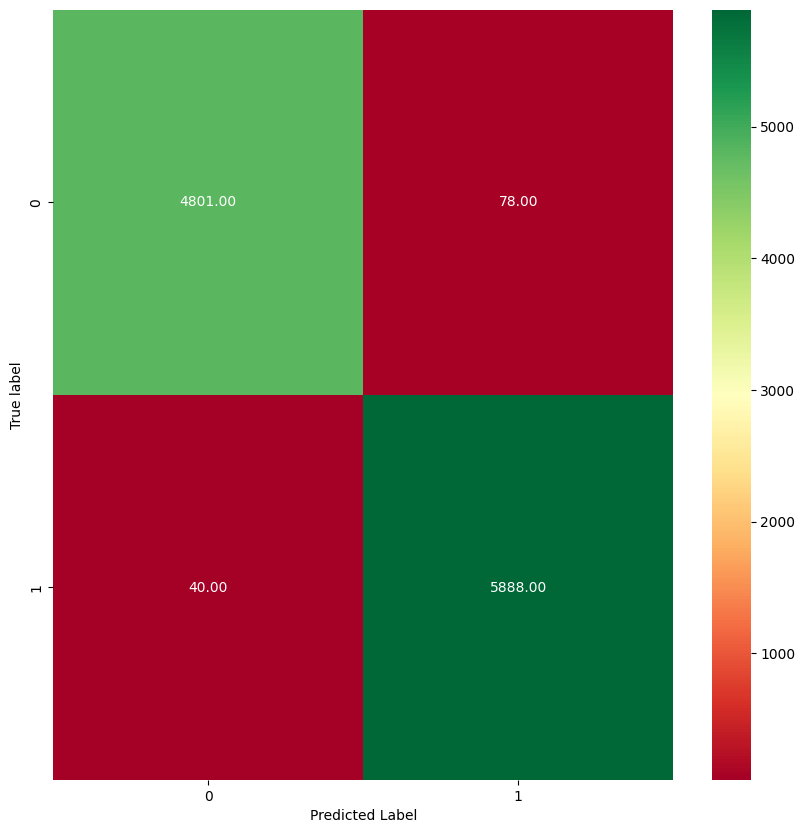

In [51]:
plot_cm(y_test,y_pred)

In [52]:
print('Precision: ', precision_score(y_test,y_pred))
print('Recall: ', recall_score(y_test,y_pred))
print('F1: ', f1_score(y_test,y_pred))

Precision:  0.9869259135098893
Recall:  0.9932523616734144
F1:  0.9900790314444258


In [53]:
y_scores = pipeline_log.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
auc_score = auc(recall, precision)

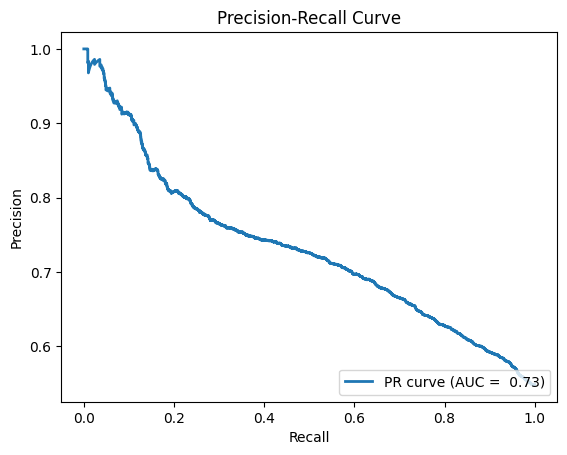

In [54]:
plt.plot(recall, precision, lw=2, label=f'PR curve (AUC = {auc_score: .2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

**Conclusion**

Using KNN in comparison to Logistic Regression, shows a huge improvement in scores. KNN is the better model to predict whether the mushroom was edible or poisonious. Log Regression showed a 68% of F1 scores and KNN 99% of F1 scores.